In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 4801 (delta 8), reused 10 (delta 2), pack-reused 4779
Receiving objects: 100% (4801/4801), 7.80 MiB | 12.80 MiB/s, done.
Resolving deltas: 100% (3270/3270), done.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (0.29.21)
     |████████████████████████████████| 11.5MB 265kB/s 
Requirement already up-to-date: numpy>=1.18.5 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 6)) (1.19.5)
     |████████████████████████████████| 50.4MB 65kB/s 
     |████████████████████████████████| 2.2MB 49.8MB/s 
     |████████████████████████████████| 645kB 50.6MB/s 
     |████████████████████████████████| 25.9MB 126kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requ

/content/yolov5


In [1]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.7.1 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [2]:
!curl -L "https://app.roboflow.com/ds/zRtKivHIQo?key=BUukfnVmdB" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1635      0 --:--:-- --:--:-- --:--:--  1632
100 28.7M  100 28.7M    0     0  21.4M      0  0:00:01  0:00:01 --:--:--  315M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_20210209_175023_jpg.rf.05085ca94f48ab064f92fb552b1cd601.jpg  
 extracting: test/images/IMG_20210209_175025_jpg.rf.e9d6c67821c930b064fc45e0ae868295.jpg  
 extracting: test/images/IMG_20210209_175216_jpg.rf.74d44d4099eb3cae68886d833926ec33.jpg  
 extracting: test/images/IMG_20210209_175310_jpg.rf.97c0f57fa872cbe3bbdb16d81bdad77c.jpg  
 extracting: test/images/IMG_20210209_175424_jpg.rf.f6ef30b053571de9e01e9dfc42ae6093.jpg  
 extracting: test/images/IMG_20210209_175426_jpg.rf.cee8af0b59d3e75fc55fa3deb1f2b9e3.

In [3]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 9
names: ['child poverty in ireland', 'child protection practices in ireland', 'children of the global village', 'local partnerships for social inclusion', 'managing staff in early years settings', 'my life in football', 'the death of bunny munro', 'transformations', 'understanding children']

In [4]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [5]:
%cat /content/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [6]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [7]:
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 5000 --data '../data.yaml' --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

Streaming output truncated to the last 5000 lines.

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 4003/4999      1.4G   0.02077   0.04303   0.00307   0.06687        90       416: 100% 4/4 [00:00<00:00,  7.00it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:00<00:00,  5.46it/s]
                 all          15         115       0.961       0.912       0.929       0.573

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 4004/4999      1.4G   0.02051   0.04909  0.003245   0.07285       114       416: 100% 4/4 [00:00<00:00,  7.43it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:00<00:00,  6.22it/s]
                 all          15         115       0.963       0.911       0.929       0.573

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 4005/4999      1.4G   0.0217

GROUND TRUTH TRAINING DATA:


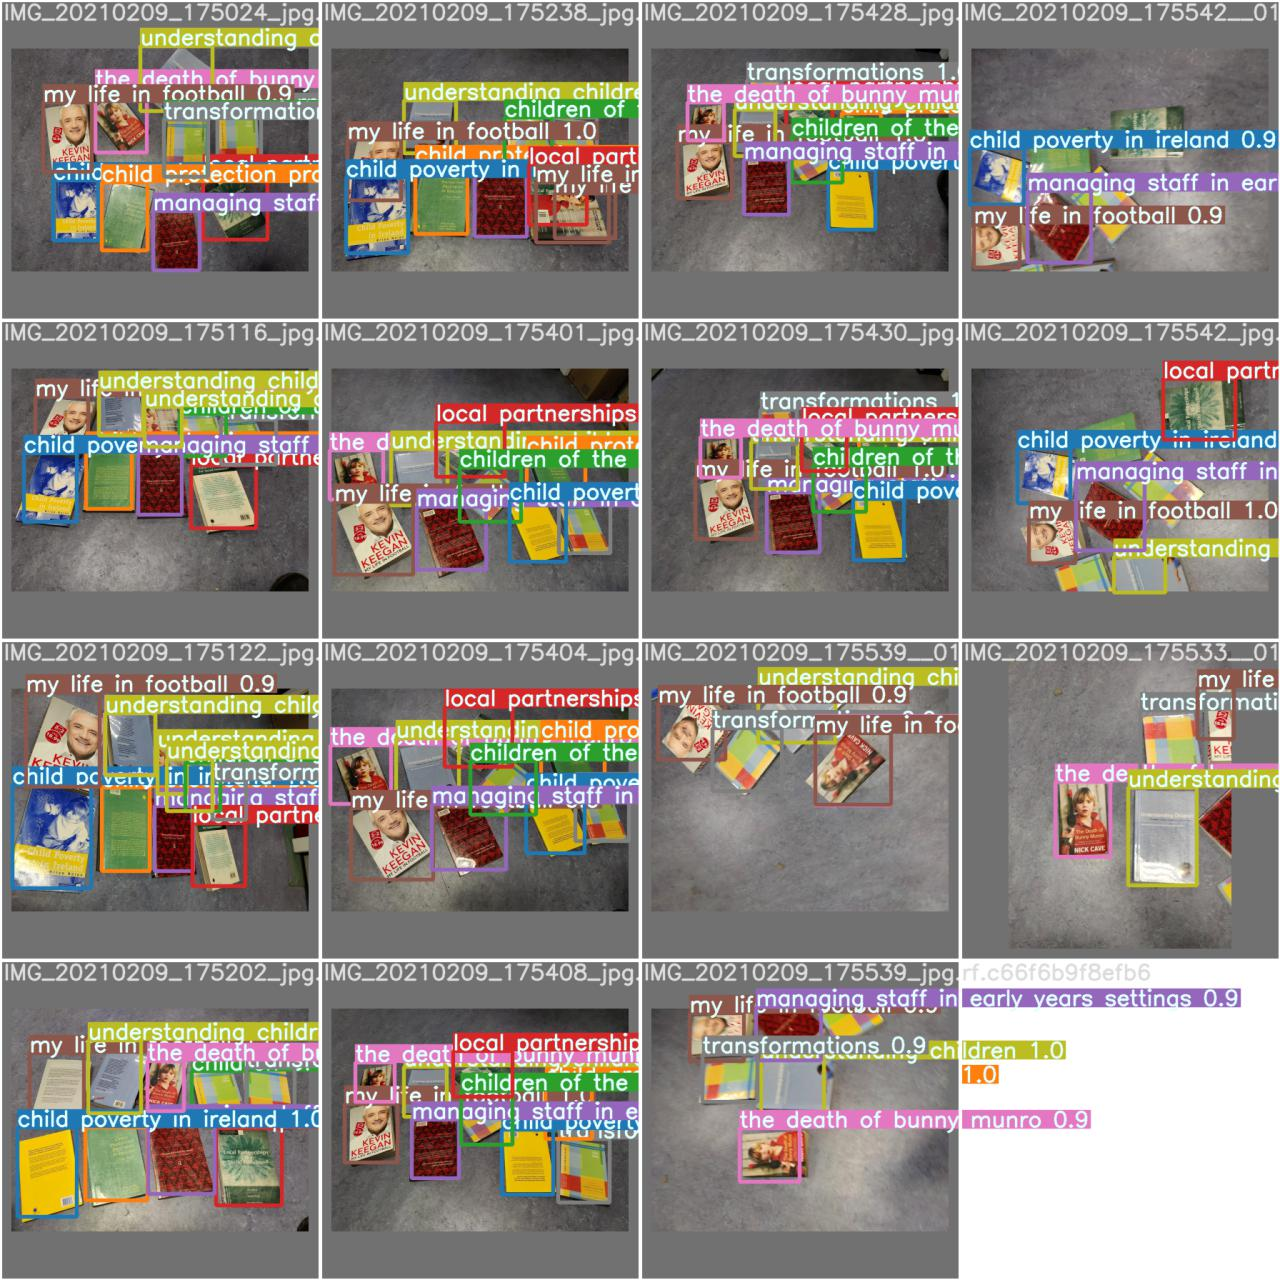

In [8]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/test_batch0_pred.jpg', width=900)

GROUND TRUTH TRAINING DATA:


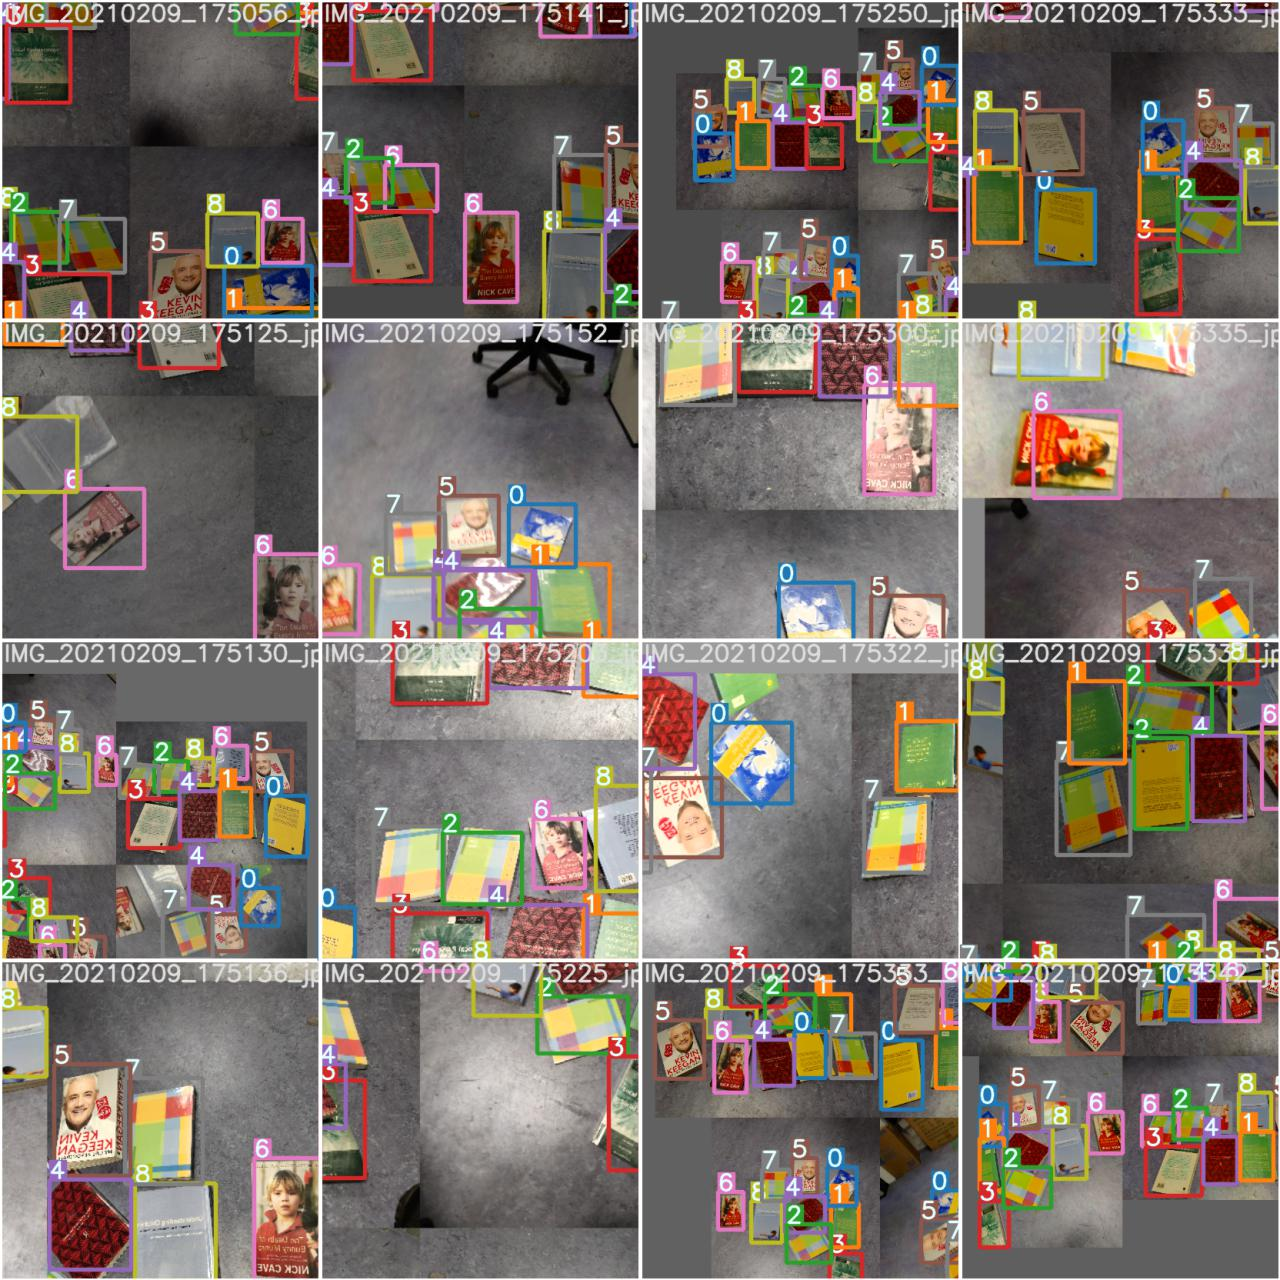

In [9]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [11]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'])
YOLOv5 v4.0-77-g3e560e2 torch 1.7.1 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7075486 parameters, 0 gradients, 16.4 GFLOPS
image 1/15 /content/yolov5/../test/images/IMG_20210209_175023_jpg.rf.05085ca94f48ab064f92fb552b1cd601.jpg: 320x416 1 child poverty in ireland, 1 child protection practices in ireland, 1 children of the global village, 1 local partnerships for social inclusion, 1 managing staff in early years settings, 1 my life in football, 1 the death of bunny munro, 1 transformations, 1 understanding children, Done. (0.012s)
image 2/15 /content/yolov5/../test/images/IMG_20210209_175025_jpg.rf.e9d6c67821c930b064fc45e0ae868295.